# Credit card fraud prediction in financial payment services

## Introduction

Intro to credit card fraud levels increasing. Industry metrics, etc. Add here

## Getting familiar with the data

The tricky part about transactional data is that due to the private nature of transactions, there aren't any publicly available datasets. Yet transactional data is still needed for continued research into fraud detection. 

The simulated data used here is based on a simulator called PaySim which helps bridge the gap between unavailable public data and the need to continue improving fraud detection systems. PaySim utilizes aggregated real world data taken from a private dataset to generate synthetic transactional data resembling normal transactions.
This real world data is a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. More information about the data can be found here: https://www.kaggle.com/ealaxi/paysim1 

The main challenge the dataset poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data.


## Our goal

Most companies have a fraud loss rate of: ___
We aim to generate a model that falls within this range. We want to be able to better predict and label fraud transactions when they occur. 
Other metrics we can use to evaluate our model __

Include info from web on metrics

### Data Wrangling

In [1]:
# We can start by importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# This gives us a first look at the data
df = pd.read_csv('fraud_data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# We can start by checking for any null values
# We can see that there are no null values!

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
# A few of the columns we can look at in detail are amount, old and new origin balance, old and new destination balance 

df[['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [5]:
# We can also verify the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### EDA (Exploratory Data Analysis)

Now we can look further into the fradulent/not fradulent labels.

In [6]:
# Only 16 transactions are labeled as fraud
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [7]:
# Our data contains 8213 fradulent transactions
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

We see that out of over 6 million transactions, only 16 transactions were actually flagged as fraud, and over 8200 were fradulent transactions! 

We get a better visual of those transactions below.

In [8]:
flagged = df[df['isFlaggedFraud'] == 1]
unflagged = df[df['isFlaggedFraud'] == 0]

In [9]:
flagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


We see from the above that only 16 of the 6 million+ transactions were flagged as fraud. This begs the question, what basis is this system flagging transactions as fraud? 

According to the documentation from the data source, a transaction is flagged as fraud if a transfer exceeds 200,000. However, as we see, there are many transactions that were over 200,000 but not flagged. 

In [10]:
# The type of transaction that is flagged fraud is only 'transfer'
flagged['type'].value_counts()

TRANSFER    16
Name: type, dtype: int64

In [11]:
# Based on the documentation, this should have been flagged as fraud
transfer = df.loc[df['type'] == 'TRANSFER']
transfer.loc[transfer['isFlaggedFraud'] == 0]['amount'].max()

92445516.64

In [12]:
fraud = df[df['isFraud'] == 1]

In [13]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [15]:
# Additionally,'isFlaggedFraud' is not related to customers who transact more than once where 'isFlagedFraud' is set.
# We obtain a list of names where there was more than 1 fraud transaction

names = []
multiple_flagged = []

for i in fraud['nameDest'].value_counts().index:
    if fraud['nameDest'].value_counts()[i] > 1:
        names.append(i)
    if i in flagged['nameDest']:
        multiple_flagged.append(i)

In [16]:
# We see that none of the addresses that had multiple fraud transactions were flagged as fraud
print('Addresses with multiple fraud transactions that were flagged: {}'.format(len(multiple_flagged)))

print('Number of addresses with multiple fraud transactions: {}'.format(len(names)))

Addresses with multiple fraud transactions that were flagged: 0
Number of addresses with multiple fraud transactions: 44


After looking at these, we can make the decision to drop the 'isFlaggedFraud' column, for several reasons.

    1. There are only 16 flagged transactions out of over 6 million.
    2. The column does not flag all transfers over 200,000 as fraud, and is not related to transfer type or amount. 
    3. The column is not based on multiple fraud transactions.

In [17]:
df = df.drop(labels='isFlaggedFraud', axis=1)

### Reducing data size

As mentioned before, one challenge the dataset poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data.
In an ideal case we should be looking at a 50:50 split of data for our model in terms of fraud transactions to non-fraud transactions. In our case here, we have 8million data to 8000 fraud. We need to reduce our non-fraud data down to something more manageable for our future model. 

In [18]:
len(df)

6362620

In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [20]:
# We are aiming for a ratio of 90:10, which would have us with about 1 million rows of nonfraud data and 8000 of fraud.
# One approach we can try is to drop non-fraud data values where the amount is less than the fraud mean.

#Faud mean
fraud_mean = fraud['amount'].mean()

non_fraud = df[df['isFraud'] == 0]
df = non_fraud[non_fraud['amount'] < fraud_mean]
len(df)

6282129

We see that we still need to downgrade the data further, this process only eliminated less than 100,000 rows

Another approach we could take is to reduce the original dataframe by type, to only the types where fraud occurs: Transfer and Cash out. 

In [21]:
# We can see the breakdown of the fraud transactions, they are all either transfers or cash outs.
fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [22]:
# This is the breakdown of the entire dataset for payment types
df['type'].value_counts()

CASH_OUT    2233302
PAYMENT     2151495
CASH_IN     1399273
TRANSFER     456627
DEBIT         41432
Name: type, dtype: int64

We can get a sense of the fraud transactions, which usually occur with money being sent to a fradulent individual (Transfer) and when money is sent to a fraud account and cashed out (CASH OUT). 

We can also see that the number of fraudulent 'TRANSFER' and 'CASH OUT' transactions is nearly equal, which makes sense and aligns with the description from the data source.

In [23]:
# We reduce the dataset to only transfer and cash out transaction types. 
df = df.loc[(df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0
...,...,...,...,...,...,...,...,...,...,...
6362313,718,CASH_OUT,111963.72,C1438119383,4514.00,0.0,C99772923,154925.27,266888.99,0
6362317,718,CASH_OUT,317177.48,C857156502,170.00,0.0,C784108220,345042.13,662219.61,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.00,0.0,C1818183087,0.00,159188.22,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.00,0.0,C1515639522,24893.67,211167.51,0


### Checking time of day

We can also group the data by time of day. We define morning as hour 6-11, afternoon as 11-5, evening as 5-9, and night as 10-6.
The step column is broken down into hours of the month, ranging from 1 to 744, for a total of 31 days. Note though that our reduced data has a max step of 718.



In [24]:
# We assign the step values into a time of day to see if fraud is coorelated to time of day at all

morning_transaction = []
noon_transaction = []
evening_transaction = []
night_transaction = []

time_slots = [range(6,12), range(11,18), range(17,22), range(21,30)]

for t in time_slots:
    for x in t:
        for i in range(718):
            transaction = (x + (24*i))
            if transaction <= 718:
                if t == time_slots[0]:
                    morning_transaction.append(transaction)
                if t == time_slots[1]:
                    noon_transaction.append(transaction)
                if t == time_slots[2]:
                    evening_transaction.append(transaction)
                if t == time_slots[3]:
                    night_transaction.append(transaction)

In [25]:
morning = df.loc[df.step in morning_transaction]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

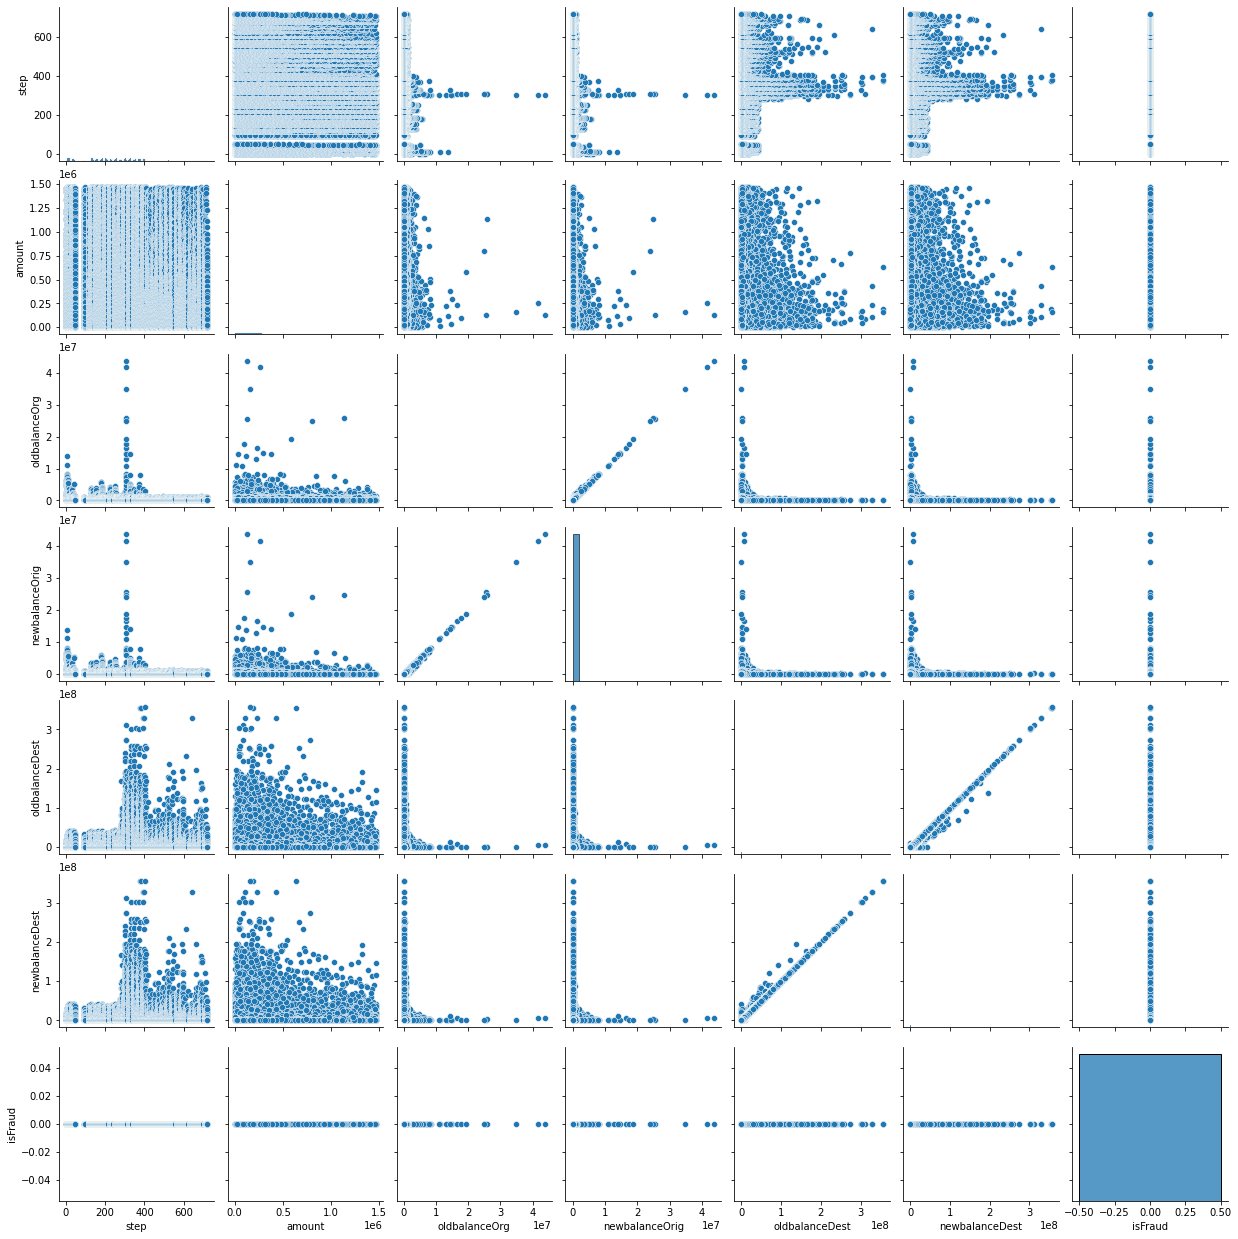

In [26]:
_ = sns.pairplot(df)